In [1]:
import pandas as pd
df = pd.read_csv("train_small.csv")

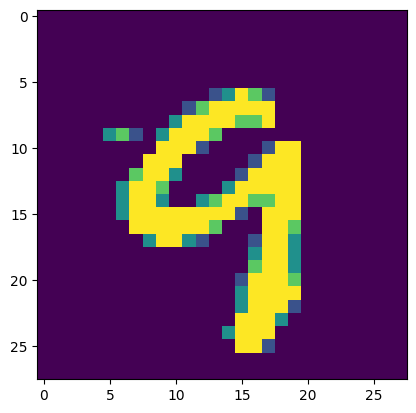

In [3]:
import numpy as np
import matplotlib.pyplot as plt

image = np.array(df.loc[1359][1:])
image = np.reshape(image, (28, 28))
plt.imshow(image)


The things that we are measuring are the images (the overall shape of the points that are in the (x, y) plane or the array above) and the data points/measurements are the pixel locations and values. We are trying to use PCA to measure the picutures with the measurements the pixels.

I'm choosing to center the rows of my data around zero. This means that we are essentially measuring the changes in the pixel brightness at the image level. Ie, we are measuring the similarity and differneces of each of the data points along the colums of each image, rather than the rows. This way, we are centering each individual image around the origin, rather than the pixels in each position for each image around the origin.

In [8]:
# Centering the columns
for i in range(len(df)):
  avg = df.loc[i].sum() / len(df.loc[i])
  for j in range(1,len(image[0])):
    df.loc[i][j] -= avg


In [9]:

from sklearn.decomposition import PCA
import numpy as np
import matplotlib
#getting the covariance matrix

covariance_matrix = np.cov(df, rowvar=False)


eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

first_principal_component = sorted_eigenvectors[:, 0]

image = np.reshape(first_principal_component[1:], (28, 28))
plt.imshow(image)




ModuleNotFoundError: No module named 'sklearn'

In [ ]:

second_principal_component = sorted_eigenvectors[:, 1]
image = np.reshape(second_principal_component[1:], (28, 28))
plt.imshow(image)

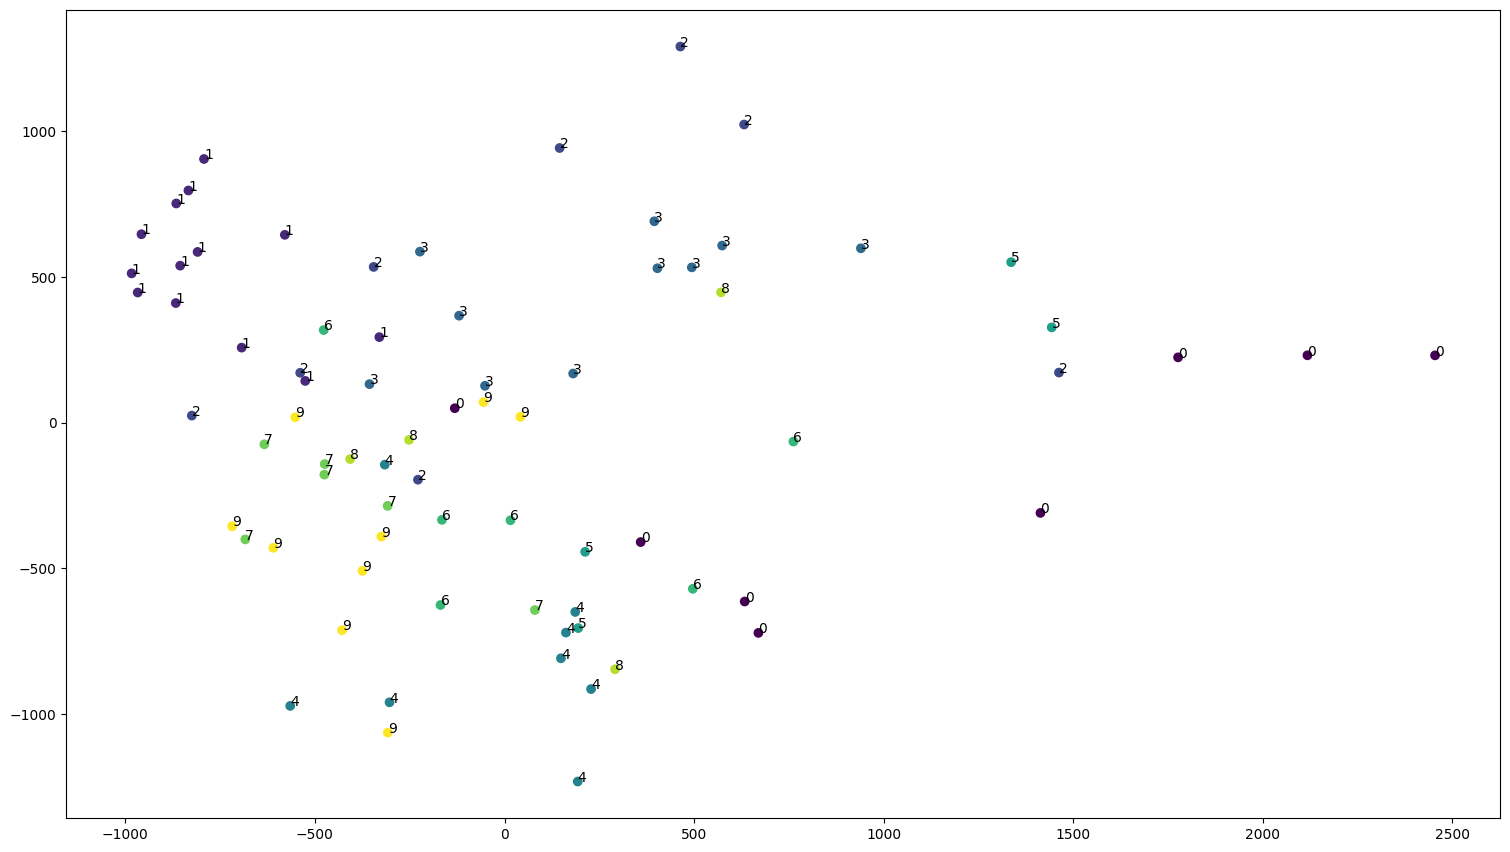

In [17]:

from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

subset_df = df.loc[:75, df.columns != "label"]
labels = df.loc[:75, df.columns == "label"]["label"]
pca = PCA(n_components=2)
pca.fit(subset_df)


transformed_data = pca.transform(subset_df)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(transformed_data[:,0], transformed_data[:,1], c=labels)

for i, txt in enumerate(labels):
  ax.annotate(txt, (transformed_data[:,0][i], transformed_data[:,1][i]))

 


Using only two principal components, we can get closer to an accurate measurement then we would have when guessing, but we cannot get 100% or probably even 90% accuracy with the first two prncipal componenets. we can see above that there are numbers which are more accurate than others, like 1, which is heavily grouped together in the top left hand corner of the graph, but we may not be able to get to high levels of accuracy, where we see in the 0, -600 area there are 4, 5, 7, 8 closely grouped together. Certain more similar digits are grouped together, like the 5's and 2's being grouped closer than the 0's and 4's for example, simply because they look more alike than one another. While the first 2 principal componenets can't accuratly predict these things, we see from the graph above that it certianly makes progress in doing so.

In [18]:

#function returns the k lengthed array representing the projections onto the k
#dimensional space for each image

def projections(k):

  subset_df = df.loc[:, df.columns != "label"]
  labels = df.loc[:, df.columns == "label"]["label"]
  pca = PCA(n_components=k)
  pca.fit(subset_df)


  transformed_data = pca.transform(subset_df)

  return transformed_data  




In [ ]:
#9
#Because this calculation is so load heavy on my computer, I'm going to 
#perform it for only 5000 of the images. 

from scipy.spatial import distance
min_distance = float('inf')
#k=10
arr = projections(10)
labels = df.loc[:, df.columns == "label"]["label"]

for i in range(0, 5000):
  for j in range(0, 5000):
    if labels[i] != labels[j] and distance.euclidean(arr[i], arr[j]) < min_distance: 
      min_distance = distance.euclidean(arr[i], arr[j])

print(min_distance)

In [ ]:
#10 

arr = projections(30)
labels = df.loc[:, df.columns == "label"]["label"]
proj_by_numbers = []
mean_proj = []
for i in range(10):
  number_list = [] 
  for j in range(len(labels)):
    if labels[j] == i:
      number_list.append(arr[j])
  proj_by_numbers.append(np.array(number_list))

proj = np.array(proj_by_numbers)
for i in range(10):
  mean_proj.append(proj_by_numbers[i].mean(axis=0))

#here, proj is an array of length 10 with the 10 average points for the numbers
#so now we'll use this to figure out which digit my penncard number represents

image = arr[1359]
min_distance = float('inf')
answer = 0
for i in range(10):
  dist = distance.euclidean(mean_proj[i], image)
  if dist<min_distance:
    min_distance = dist
    answer = i

print(labels[1359])
print(answer)

#for my number above, it thinks that it is closest to the number 9, which it is

In [ ]:
#11
#repeating this to get an accuracy representation for all integers

predicted_labels = []
for i in range(len(arr)):
  min_distance = float('inf')
  image = arr[i]
  answer = 0
  for i in range(10):
    dist = distance.euclidean(mean_proj[i], image)
    if dist < min_distance:
      min_distance = dist
      answer = i
  predicted_labels.append(answer)

similar = 0
for i in range(len(predicted_labels)):
  if predicted_labels[i] == labels[i]:
    similar += 1

print(similar / len(predicted_labels))

In [ ]:
#12 
#nearest neighbors projections
#because of the runtime of this, I am going to limit the calculation to the first
#1000 images
import math
predicted_labels = []
for i in range(1000):
  distances = []
  for j in range(len(arr)):
    dist = []
    if i == j:
      continue
    dist.append(distance.euclidean(arr[i], arr[j]))
    dist.append(labels[j])
    distances.append(np.array(dist))
  distances.sort(key=lambda x: x[0], reverse=False)
  distances = np.array(distances)
  predicted_labels.append(math.floor(distances[:5].mean(axis =0)[1]))
      

In [ ]:
correct = 0
for i in range(1000):
  if predicted_labels[i] == labels[i]:
    correct += 1
print(correct / 1000)

We can see above that the 5 nearest neighbors approach gives us a 90% accuracy, which is much better than the 80% from the previous approach


#13

You should use the maximum amount of principal components to get the maximum accuracy, while this would take a lot of (probably uneccesary) computing power, the maxmium amount of principal componenets would be equal to the rank of the original matrix which is equal to len(df)

In [ ]:
#below here, examples of working through recognition problems